# Imports 

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import os
import os.path
import numpy as np
import pickle
from glob import glob
import matplotlib
import matplotlib.pyplot as plt




# Loading Data (training input/output)


In [6]:
cities = ["austin", "miami", "pittsburgh", "dearborn", "washington-dc", "palo-alto"]

# train input data
train_austin_inp = pickle.load(open("train/austin_inputs", "rb"))
train_dearborn_inp = pickle.load(open("train/dearborn_inputs", "rb"))
train_miami_inp = pickle.load(open("train/miami_inputs", "rb"))
train_palo_alto_inp = pickle.load(open("train/palo-alto_inputs", "rb"))
train_pittsburgh_inp = pickle.load(open("train/pittsburgh_inputs", "rb"))
train_washington_dc_inp = pickle.load(open("train/washington-dc_inputs", "rb"))
# train output data
train_austin_outp = pickle.load(open("train/austin_outputs", "rb"))
train_dearborn_outp = pickle.load(open("train/dearborn_outputs", "rb"))
train_miami_outp = pickle.load(open("train/miami_outputs", "rb"))
train_palo_alto_outp = pickle.load(open("train/palo-alto_outputs", "rb"))
train_pittsburgh_outp = pickle.load(open("train/pittsburgh_outputs", "rb"))
train_washington_dc_outp = pickle.load(open("train/washington-dc_outputs", "rb"))
# combination of inputs/outputs
all_inp = np.concatenate((train_austin_inp, train_miami_inp, train_palo_alto_inp, train_pittsburgh_inp,
                          train_dearborn_inp, train_washington_dc_inp))
all_out = np.concatenate((train_austin_outp, train_miami_outp, train_palo_alto_outp, train_pittsburgh_outp,
                          train_dearborn_outp, train_washington_dc_outp))


## Input Heatmap

REFERENCE: https://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set

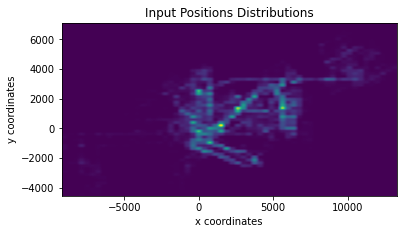

In [3]:
size = all_inp[:, :, 0].size
x_coor = all_inp[:, :, 0].reshape(size)
y_coor = all_inp[:, :, 1].reshape(size)
heatmap, xedges, yedges = np.histogram2d(x_coor, y_coor, bins=(60))
min_x, max_x, min_y, max_y = xedges[0], xedges[-1], yedges[0], yedges[-1]
extent = [min_x, max_x, min_y, max_y]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin="lower")
plt.title("Input Positions Distributions")
plt.ylabel("y coordinates")
plt.xlabel("x coordinates")
plt.show()


## Output Heatmap

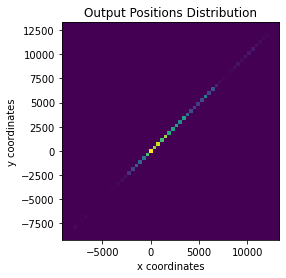

In [4]:
# print(all_out.size)
out_amt = all_out[:, 0].size
x_coor = all_out[:, 0].reshape(out_amt)
y_coor = all_out[:, 1].reshape(out_amt)
out_heatmap, out_x_edges, out_y_edges = np.histogram2d(
    x_coor, y_coor, bins=(60))
min_x, max_x, min_y, max_y = out_x_edges[0], out_x_edges[-1], out_y_edges[0], out_y_edges[-1]
extent = [min_x, max_x, min_y, max_y]

plt.clf()
plt.imshow(out_heatmap.T, extent=extent, origin="lower")
plt.title("Output Positions Distribution")
plt.ylabel("y coordinates")
plt.xlabel("x coordinates")
plt.show()


## All Cities Heatmap

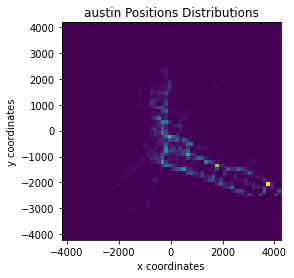

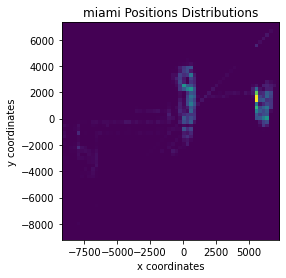

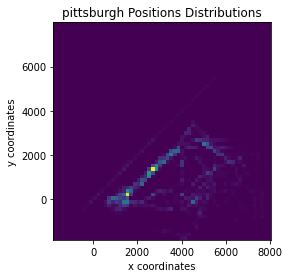

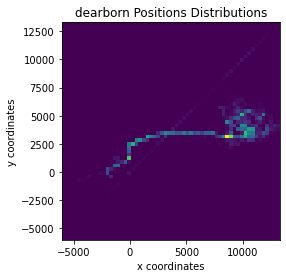

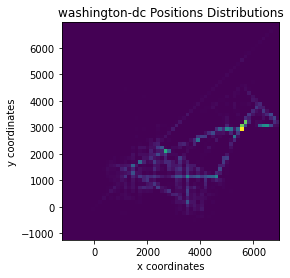

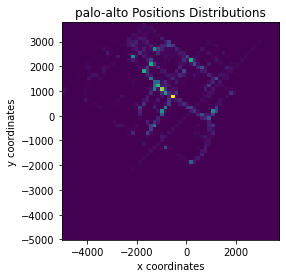

In [7]:
for i in range(len(cities)):
    inp, out = pickle.load(open("train/" + cities[i] + "_inputs", "rb")), pickle.load(open("train/"+ cities[i] +"_outputs", "rb"))
    size_inp, size_out = inp[:, :, 0].size, out[:, 0].size
    inp_x, out_x = inp[:, :, 0].reshape(size_inp), out[:, 0].reshape(size_out)
    inp_y, out_y = inp[:, :, 1].reshape(size_inp), out[:, 1].reshape(size_out)
    x = np.concatenate((inp_x, out_x))
    y = np.concatenate((inp_y, out_y))

    heatmap, x_edges, y_edges = np.histogram2d(x, y, bins=(60))
    min_x, max_x, min_y, max_y = x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]
    ext = [min_x, max_x, min_y, max_y]

    plt.clf()
    plt.imshow(heatmap.T, extent=ext, origin="lower")
    plt.title(cities[i] + " Positions Distributions")
    plt.ylabel("y coordinates")
    plt.xlabel("x coordinates")
    plt.show()
